In [71]:
import numpy as np 
import pandas as pd


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

train_data = pd.read_csv('loan_sanction_train.csv')
test_data = pd.read_csv('loan_sanction_test.csv')

In [73]:
# Concatenate the datasets
data = pd.concat([train_data, test_data], ignore_index=True)
print(data.shape)


(981, 13)


In [74]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [75]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN
980,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [77]:
print(data.isnull().sum())

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64


In [78]:
# Handle missing values for categorical columns
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Loan_Status'].fillna(data['Loan_Status'].mode()[0], inplace=True)

# Handle missing values for numerical columns
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [79]:
print(data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [80]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Label Encoding for categorical features
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Married'] = le.fit_transform(data['Married'])
data['Education'] = le.fit_transform(data['Education'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])

# One-hot Encoding for 'Dependents' column
data = pd.get_dummies(data, columns=['Dependents'])


In [81]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


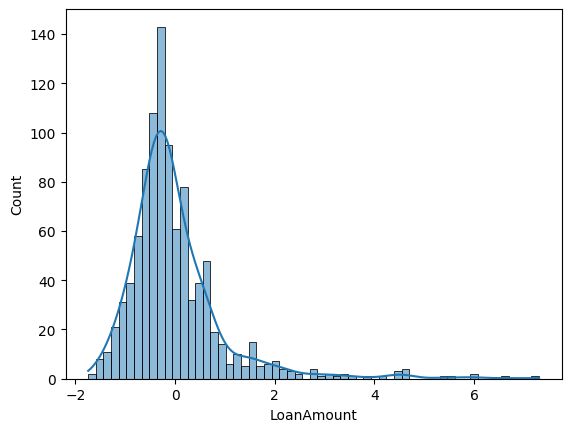

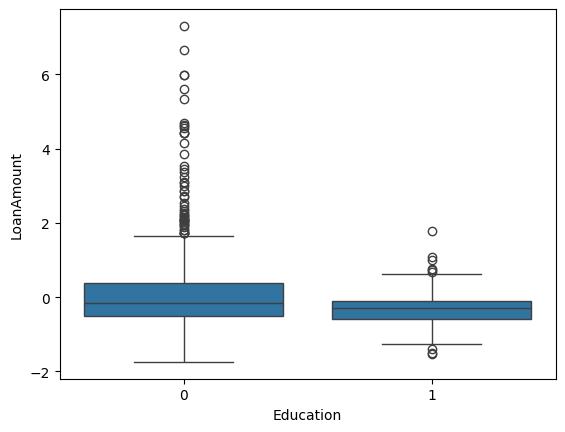

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Loan Amount
sns.histplot(data['LoanAmount'], kde=True)
plt.show()

# Relationship between Education and Loan Amount
sns.boxplot(x='Education', y='LoanAmount', data=data)
plt.show()


In [83]:
data.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,981.000000,981.000000,981.000000,981.000000,9.810000e+02,9.810000e+02,9.810000e+02,9.810000e+02,981.000000,981.000000
mean,0.814475,0.646279,0.222222,0.121305,-4.345827e-17,-1.014026e-16,8.691654e-17,-3.603415e-16,0.849134,1.053007
std,0.388921,0.478368,0.415952,0.326648,1.000510e+00,1.000510e+00,1.000510e+00,1.000510e+00,0.358101,0.801302
min,0.000000,0.000000,0.000000,0.000000,-9.099810e-01,-5.895062e-01,-1.742574e+00,-5.222176e+00,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,-4.049040e-01,-5.895062e-01,-5.377015e-01,2.705276e-01,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,-2.424010e-01,-1.810255e-01,-2.102906e-01,2.705276e-01,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5.906413e-02,2.808153e-01,2.349883e-01,2.705276e-01,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.332002e+01,1.474398e+01,7.307064e+00,2.132461e+00,1.000000,2.000000


In [84]:
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,1,0,0,0,0.117565,-0.589506,-0.210291,0.270528,1.0,2,Y,True,False,False,False
1,LP001003,1,1,0,0,-0.104844,-0.034561,-0.184098,0.270528,1.0,0,N,False,True,False,False
2,LP001005,1,1,0,1,-0.382944,-0.589506,-0.996077,0.270528,1.0,2,Y,True,False,False,False
3,LP001006,1,1,1,0,-0.456202,0.278239,-0.288869,0.270528,1.0,2,Y,True,False,False,False
4,LP001008,1,0,0,0,0.144093,-0.589506,-0.013844,0.270528,1.0,2,Y,True,False,False,False


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    int64  
 2   Married            981 non-null    int64  
 3   Education          981 non-null    int64  
 4   Self_Employed      981 non-null    int64  
 5   ApplicantIncome    981 non-null    float64
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    int64  
 11  Loan_Status        981 non-null    object 
 12  Dependents_0       981 non-null    bool   
 13  Dependents_1       981 non-null    bool   
 14  Dependents_2       981 non-null    bool   
 15  Dependents_3+      981 non-null    bool   
dtypes: bool(4), float64(5), in

In [86]:
from sklearn.model_selection import train_test_split
# Assuming 'Loan_Status' is the target variable
X = data.drop(columns=['Loan_ID', 'Loan_Status'])
y = data['Loan_Status']

In [87]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    int64  
 1   Married            981 non-null    int64  
 2   Education          981 non-null    int64  
 3   Self_Employed      981 non-null    int64  
 4   ApplicantIncome    981 non-null    float64
 5   CoapplicantIncome  981 non-null    float64
 6   LoanAmount         981 non-null    float64
 7   Loan_Amount_Term   981 non-null    float64
 8   Credit_History     981 non-null    float64
 9   Property_Area      981 non-null    int64  
 10  Dependents_0       981 non-null    bool   
 11  Dependents_1       981 non-null    bool   
 12  Dependents_2       981 non-null    bool   
 13  Dependents_3+      981 non-null    bool   
dtypes: bool(4), float64(5), int64(5)
memory usage: 80.6 KB


In [88]:

# Encode the target variable if it's categorical
y = le.fit_transform(y)

In [89]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(784, 14) (197, 14) (784,) (197,)


In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
lr = LogisticRegression()
gnb = GaussianNB()
lsvc = LinearSVC()
svc = SVC()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
sgdc = SGDClassifier()
gbc = GradientBoostingClassifier()

models = [dtc, lr, gnb, lsvc, svc, rfc,  knn, sgdc, gbc]
model_name = ['Decision Tree', 'Logistic Regression', 'Gaussian Naive Bayes', 'Linear SVC', 'SVC', 'Random Forest',
              'KNN or k-Nearest Neighbors', 'Stochastic Gradient Descent', 'Gradient Boosting']

acc_scores = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_model = round(accuracy_score(y_pred, y_test) * 100, 2)
    acc_scores.append(acc_model)

In [91]:
models_acc = pd.DataFrame({'Model name': model_name, 'Accuracy scores': acc_scores})
models_acc.sort_values(by='Accuracy scores', ascending=False)

,Model name,Accuracy scores
2,Gaussian Naive Bayes,81.73
5,Random Forest,81.73
8,Gradient Boosting,81.22
3,Linear SVC,81.22
6,KNN or k-Nearest Neighbors,80.71
4,SVC,79.70
1,Logistic Regression,79.70
7,Stochastic Gradient Descent,78.68
0,Decision Tree,76.65


In [92]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = lr.predict(X_test)

print('Precision score is: {:2f} \nRecall score is: {:2f} \nf1 score is: {:2f}'.format(
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted')))

Precision score is: 0.768211 
Recall score is: 0.796954 
f1 score is: 0.771381


In [93]:
# Define the models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVC', SVC()),
    ('Linear SVC', LinearSVC()),
    ('KNN or k-Nearest Neighbors', KNeighborsClassifier()),
    ('Stochastic Gradient Descent', SGDClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

In [94]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix

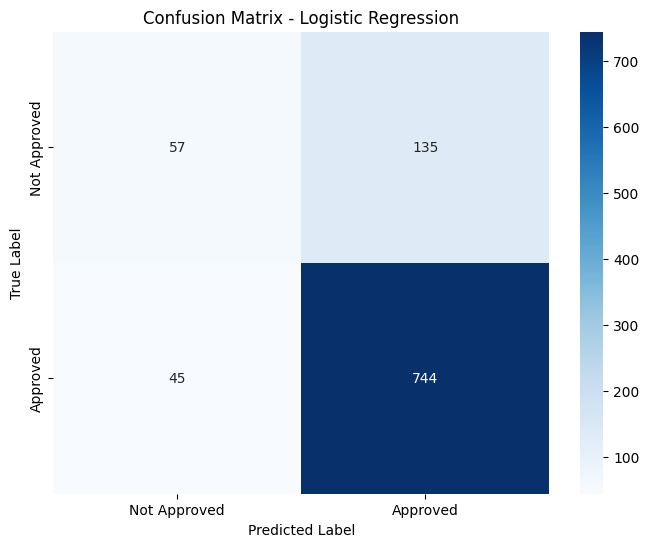

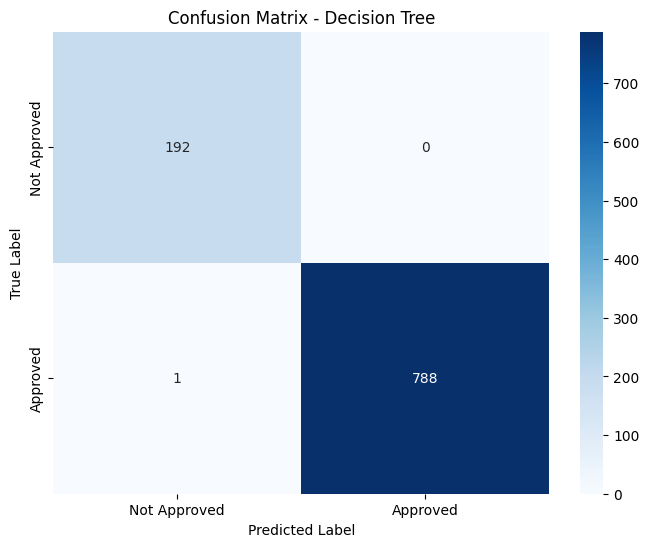

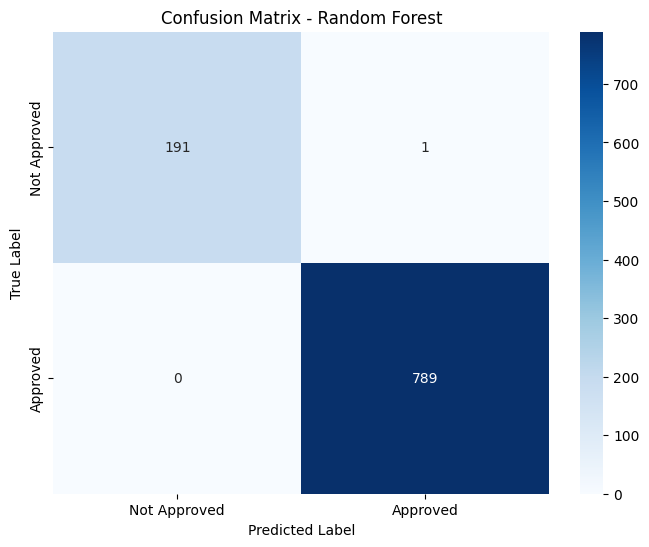

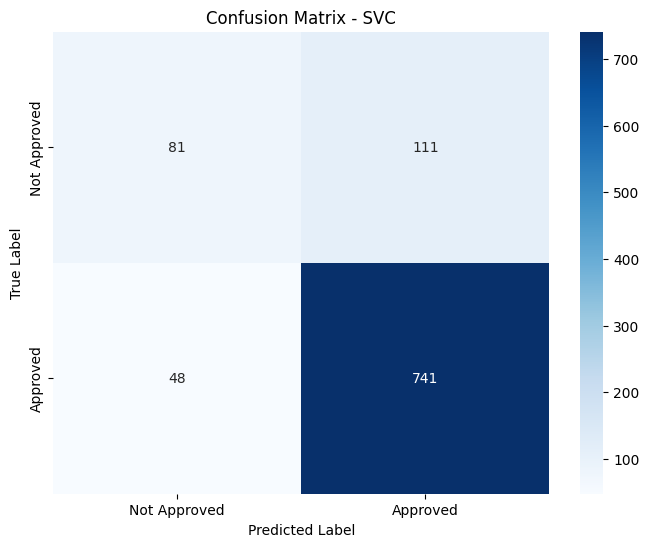

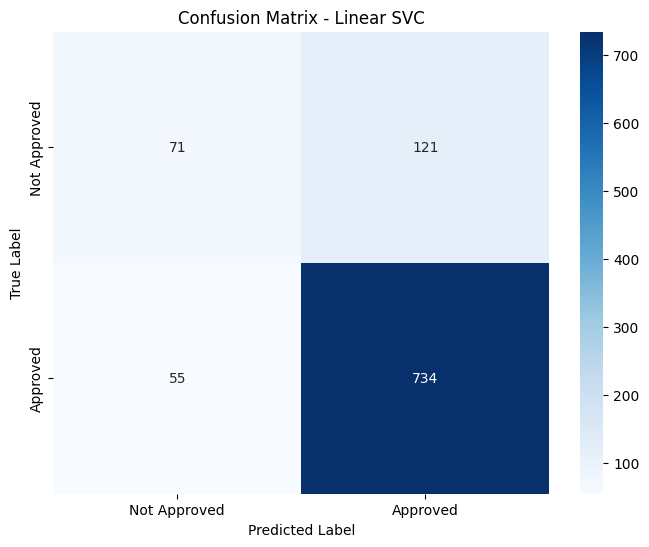

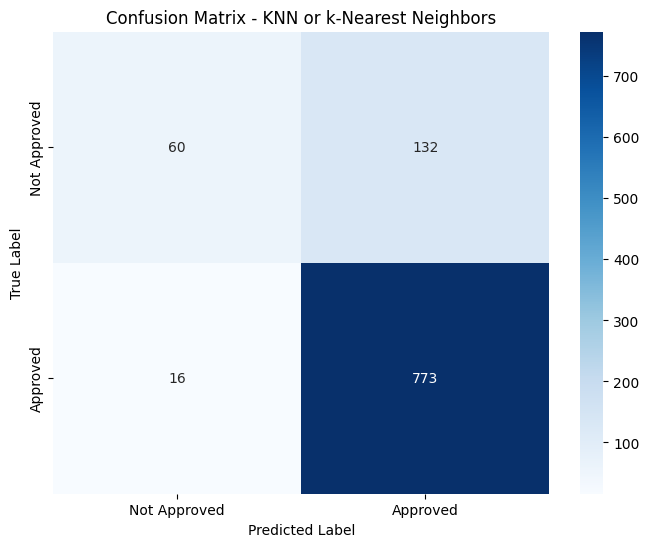

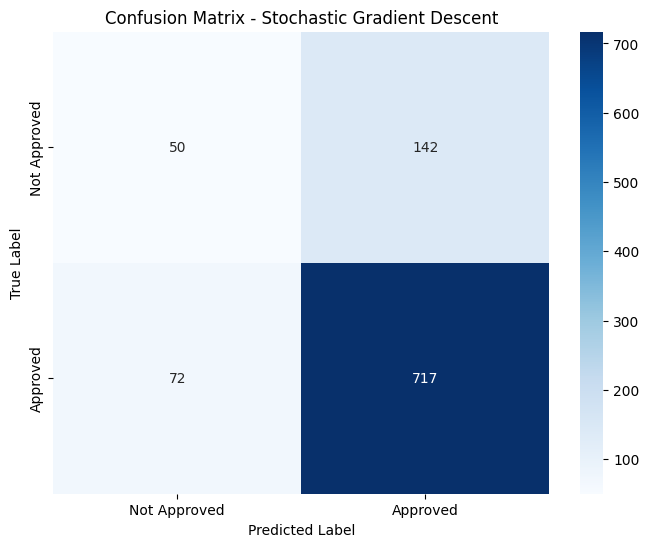

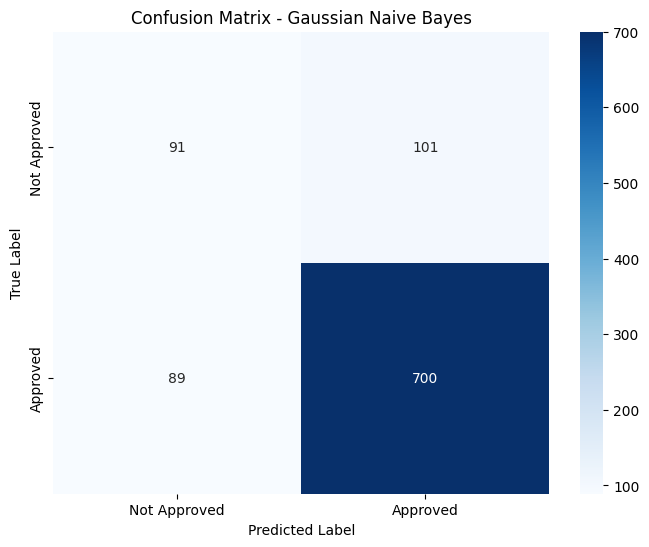

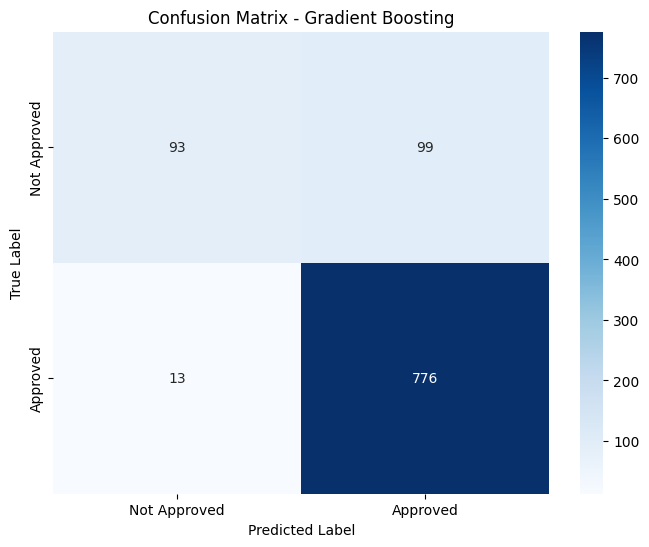

In [95]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Cross-validation and confusion matrix plotting
for name, model in models:
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    cv_results = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    model.fit(X, y)
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    class_names = ['Not Approved', 'Approved']  # Adjust class names if needed
    plot_confusion_matrix(cm, classes=class_names, model_name=name)

In [96]:
import joblib
# Dictionary to store models
models = {
    'logistic_regression': LogisticRegression(),
    'gaussian_nb': GaussianNB(),
    'svc': SVC(),
    'knn': KNeighborsClassifier(),
    'linear_svc': LinearSVC(),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'gradient_boosting': GradientBoostingClassifier(),
    'sgd': SGDClassifier()
}

# Train and save each model
for name, model in models.items():
    model.fit(X_train, y_train)
    joblib.dump(model, f"{name}.pkl")
    print(f"Model {name} saved.")

Model logistic_regression saved.
Model gaussian_nb saved.
Model svc saved.
Model knn saved.
Model linear_svc saved.
Model decision_tree saved.
Model random_forest saved.
Model gradient_boosting saved.
Model sgd saved.


In [98]:
model =  DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compare predictions with actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head(10))

   Actual  Predicted
0       1          1
1       1          1
2       0          1
3       1          1
4       0          0
5       1          1
6       1          1
7       0          0
8       1          1
9       0          1
